In [2]:
%load_ext autoreload
%autoreload 2
%cd '..'

/dss/dsshome1/03/di93fup/polarization_reddit


In [24]:
import seaborn as sns
sns.set_theme()
from matplotlib import pyplot as plt

from preprocessing.utils import (
    load_event_comments,
    load_event_vocab,
)

from events.mass_shootings_constants import (
    MASS_SHOOTINGS_EVENTS_INFO,
)
from eda.utils import plot_event_comments_distribution
from eda.constants import PARTIES_COLORS

In [ ]:
THEME = "gun_control"
EVENT_KEY = "mass_shootings"

In [ ]:
event_comments = load_event_comments(theme=THEME, event_name=EVENT_KEY)

event_comments = event_comments[event_comments["event_name"] != "charleston_church_shooting"]

In [ ]:
# count number of comments per event_name and party

data = event_comments.groupby(["event_name", "party"], as_index=False).agg(number_comments=("id", "count"))


data["event_date"] = data["event_name"].apply(lambda x: MASS_SHOOTINGS_EVENTS_INFO[x]["date"])
data["event_name"] = data["event_name"].apply(lambda x: MASS_SHOOTINGS_EVENTS_INFO[x]["name"])

# order rows by MASS_SHOOTINGS_EVENTS_INFO["event_name"]["date"] ascending

data = data.sort_values(by=["event_date", "party"])


In [ ]:
plot_event_comments_distribution(data, THEME, EVENT_KEY)

In [4]:
THEME = "elections"
EVENT_KEY = "us_elections_2016"

event_comments = load_event_comments(theme=THEME, event_name=EVENT_KEY)

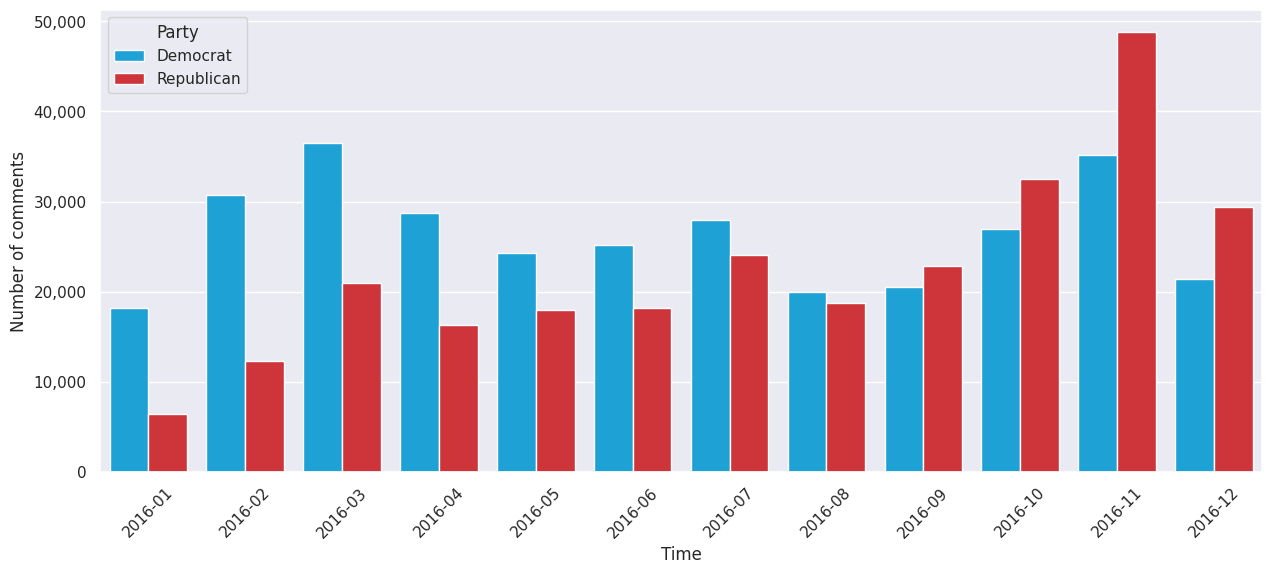

In [26]:
# plot barplot with monthly number of dem and rep users per month
import pandas as pd
import matplotlib as mpl
event_comments["date"] = pd.to_datetime(event_comments["created_utc"], unit="s")

event_comments["month"] = event_comments["date"].dt.month

data = event_comments.groupby([pd.Grouper(
    key="date",
    freq="M"
), "party"], as_index=False).agg(number_users=("author", "nunique"))

fig = plt.figure(figsize=(15, 6))

# format as year and date
data["month"] = data["date"].dt.strftime('%Y-%m')

data["Party"] = data["party"].apply(lambda x: "Democrat" if x == "dem" else "Republican")

ax = sns.barplot(x="month", y="number_users", hue="Party", data=data, palette=PARTIES_COLORS)
ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
ax.set_xlabel("Time")
ax.set_ylabel("Number of comments")

plt.show()